In [1]:
#add the aare build folder to sys.path to make it visible to python
import sys; sys.path.append('/home/l_msdetect/erik/aare/build')
from helpers import nb_aare_version
nb_aare_version()

import pickle

#Our normal python imports
from pathlib import Path
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import boost_histogram as bh
import time

import tifffile

#Directly import what we need from aare
import aare
from aare import ClusterFile


base = Path('/mnt/sls_det_storage/moench_data/TriestePEPI_202502/pepi_data/BT2D_bamboo150uA_50kVp')
fname = base/'BT_3072.clust'
chunk_size = 1_000_000

Example run on: **2025-03-25 16:46** with aare: **dev**

File has up to: 19 chunks
/mnt/sls_det_storage/moench_data/TriestePEPI_202502/pepi_data/BT2D_bamboo150uA_50kVp/BT_3072.clust
1.0
Chunks read: 6
Reading took: 12.145s


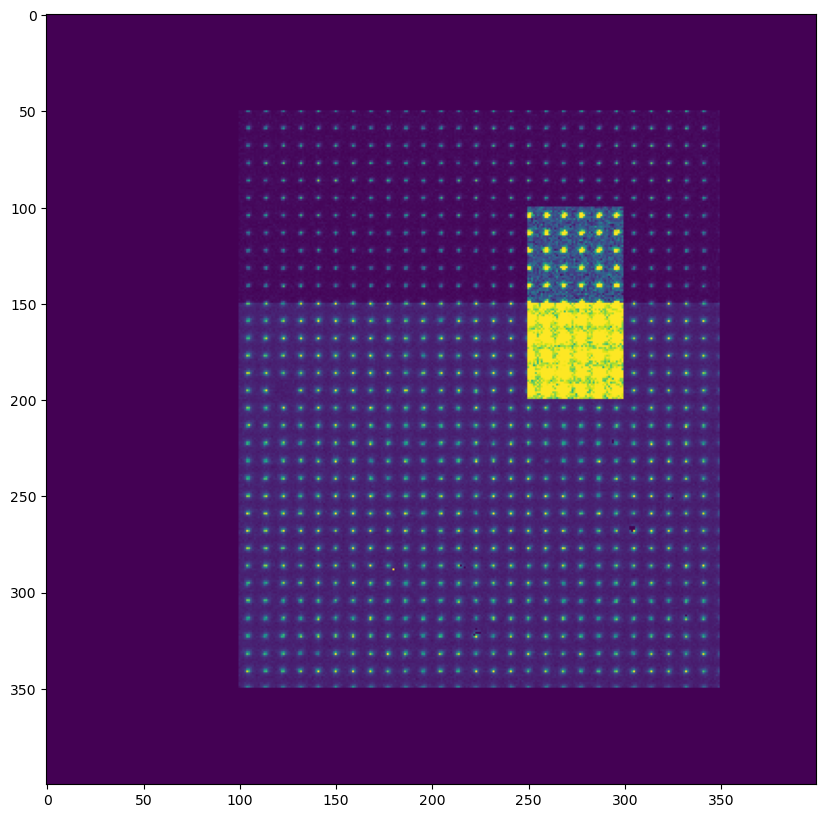

In [21]:
# Read clusters with function call
forecast = int(fname.stat().st_size/40/chunk_size)
print(f'File has up to: {forecast:.0f} chunks')

noise_map = np.zeros((400,400), dtype = np.int32)
noise_map[0:150] = 800
gain_map = np.zeros((400,400))
gain_map[:] = 1
gain_map[100:200, 250:300] = 10
image = np.zeros((400, 400))
print(fname)
roi = aare.ROI(xmin = 100, xmax = 350, ymin = 50, ymax = 350)
t0 = time.perf_counter()
print(chunk_size/1e6)



with ClusterFile(fname, chunk_size = chunk_size) as f:
        f.set_roi(roi)
        f.set_noise_map(noise_map)
        f.set_gain_map(gain_map)
        for i, clusters in enumerate(f):
            arr = np.array(clusters)
            #Very slow loop just for visualization purpose:
            for c in arr:
                image[c['y'], c['x']] += c['data'][1,1]
            print(f'Chunks read: {i}', end = '\r', flush = True)
            
print()   
t = time.perf_counter()-t0
print(f'Reading took: {t:.3f}s')

fig, ax = plt.subplots(figsize = (10,10))
im = ax.imshow(image)
im.set_clim(0,1e6)